#　線形回帰モデル

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#図のスタイルをdarkgridにする
sns.set_style('darkgrid')
#図に日本語が利用できるようにする
plt.rcParams['font.family'] = 'Yu Mincho'
%matplotlib inline
import statsmodels.api as sm

In [3]:
ac_temperature = pd.read_csv(
    'https://www.quantsresearch.com/'
    'publication/tensorflowBook/sampledata/lm_example.csv',
    index_col = [0]
)

<AxesSubplot:xlabel='最高気温', ylabel='ルームエアコン所有数量'>

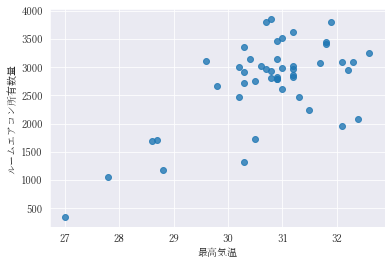

In [5]:
# labelをac_temperatureのindexに指定
sns.regplot(
    x = '最高気温',
    y = 'ルームエアコン所有数量',
    data = ac_temperature,
    fit_reg = False,
    label = ac_temperature.index
)

In [13]:
explanatory_variable = sm.add_constant(ac_temperature['最高気温'])
model = sm.OLS(
    endog =ac_temperature['ルームエアコン所有数量'],
    exog = explanatory_variable
)
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ルームエアコン所有数量   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     30.46
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.61e-06
Time:                        20:23:36   Log-Likelihood:                -365.33
No. Observations:                  47   AIC:                             734.7
Df Residuals:                      45   BIC:                             738.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.01e+04   2328.911     -4.339      0.000   -1.48e+04   -5413.680
最高気温         417.7945     75.704      5.519      0.000     265.319     570.270
==============================================================================
Omnibus:                        2.300   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.758
Skew:                          -0.473   Prob(JB):                        0.415
Kurtosis:                       3.036   Cond. No.                         837.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
推定結果の見方（まとめ）
用語 （日本語） 意味／説明
Dependent Variable 被説明変数（従属変数） 説明されるべき変数。
(Independent) Variable 説明変数（独立変数） 被説明変数の動きを説明するために用いる変数。
Coefficient 係数 説明変数が被説明変数に与える影響（説明変数が１単位変化したときに被説
明変数がどれだけ変化するか）を表す係数。
Std. Error (of Coefficients) 係数の標準誤差 係数の推定値の標準誤差。小さいほど精度の高い推定。
t-statistic t 値 係数の有意性（意味がある説明変数かどうか）を検定するための統計量。
t 値＝係数の推定値／係数の標準誤差。概ね 2 より大きければ良い。
Prob. p 値（t 検定に基づく） 説明変数として意味の無い（係数がゼロである）確率。小さければ意味のあ
る説明変数である（「有意」である）と判断。
R-squared 決定係数 被説明変数の動きのうち、説明変数の動きで説明できる割合＝回帰式の当て
はまりの良さを示す。１が最も良い。
Adjusted R-squared 自由度修正済決定係数 説明変数の数を考慮した上で当てはまりの良さを判断するのに用いる。
S.E. of Regression 回帰の標準誤差 回帰式の誤差の標準偏差。小さい方が良い。予測の精度を測る際などに使用。
Sum Squared Resid. 残差平方和 残差（説明できずに残った部分）の２乗の和。最小二乗法はこれを最小にす
るように、係数の値を求める。
Log Likelihood 対数尤度 想定した回帰モデルから見て、実際に得られた標本がどの程度もっともらし
いか。大きい方が良い。
Durbin-Watson Stat. ダービン・ワトソン比 撹乱項に系列相関があるかどうかを検定する統計量。2 に近ければ良い。
Akaike Info. Criterion 赤池情報量基準 回帰式の当てはまりの良さを示す。小さいほど良い。
Schwarz Criterion シュワルツ情報量基準 回帰式の当てはまりの良さを示す。小さいほど良い。
F-statistic F 値 回帰式が意味があるかどうかを検定する統計量。
Prob. (F-statistic) （F 検定に基づく）p 値 回帰式が意味が無い（全ての説明変数の係数がゼロである）確率。
"""